## Backtest post analysis

In [5]:
final = catalog.load('final_schedule_march_two_dates_backtest')

[09/25/24 16:10:30] INFO     Loading data from final_schedule_march_two_dates_backtest          ]8;id=750612;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=91020;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (ExcelDataset)...                                                                     

In [6]:
final.dtypes


Order                        int64
Closed?                       bool
Order_date          datetime64[ns]
Product                     object
Part ID                     object
Part Group                   int64
Part Class                   int64
Order Qty                    int64
Qty Shipped                  int64
Job Date            datetime64[ns]
Production Qty               int64
Scrap Qty                    int64
Prod Due Date       datetime64[ns]
Completed Date      datetime64[ns]
Closed Date         datetime64[ns]
Customer ID                  int64
Customer Name               object
Leadtime Target              int64
To Sort                      int64
Actual Leadtime              int64
On Time Hit                  int64
In Full Hits                 int64
OTIF Hits                    int64
Week Number                  int64
Inventory Qty                int64
Qty Completed                int64
Long Description            object
Type                        object
Size               

In [7]:
final = final[final['task'].isin([7, 20, 44])]

In [8]:
final[['Order', 'Custom Part ID', 'Job Date', 'Completed Date', 'Start_time', 'End_time']].sort_values('Completed Date').head(5)

,Order,Custom Part ID,Job Date,Completed Date,Start_time,End_time
483,4421816,LEFT-CR-8-CLS-OP1,2024-03-06,2024-03-07 08:18:47.177,2024-03-08 12:33:48.000,2024-03-08 13:13:45.600
115,4421807,RIGHT-CR-6-CLS-OP1,2024-03-06,2024-03-07 08:36:05.373,2024-03-07 09:27:55.200,2024-03-07 10:07:52.800
484,4421819,LEFT-CR-8-CLS-OP1,2024-03-06,2024-03-07 09:25:45.923,2024-03-08 12:55:43.200,2024-03-08 13:35:40.800
465,4421804,RIGHT-CR-6-CLS-OP1,2024-03-06,2024-03-07 10:03:35.550,2024-03-08 09:09:00.000,2024-03-08 09:48:57.600
490,4421814,LEFT-CR-8-CLS-OP1,2024-03-06,2024-03-07 10:22:19.007,2024-03-11 09:29:50.400,2024-03-11 10:09:48.000


[09/25/24 16:10:35] WARNING  C:\Users\JeanLucOudshoorn\AppData\Local\Temp\ipykernel_4576\1396763089 ]8;id=462874;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\warnings.py\warnings.py]8;;\:]8;id=297951;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\warnings.py#110\110]8;;\
                             .py:11: FutureWarning: The behavior of                                                
                             DatetimeProperties.to_pydatetime is deprecated, in a future version                   
                             this will return a Series containing python datetime objects instead                  
                             of an ndarray. To retain the old behavior, call `np.array` on the                     
                             result                                                                                
                               completed_dates = mdates.date2num(final['Completed                                  
                             Date'].dt.to_pydatetime())                                                            
                                                                                                                   

                    WARNING  C:\Users\JeanLucOudshoorn\AppData\Local\Temp\ipykernel_4576\1396763089 ]8;id=225901;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\warnings.py\warnings.py]8;;\:]8;id=527563;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\warnings.py#110\110]8;;\
                             .py:12: FutureWarning: The behavior of                                                
                             DatetimeProperties.to_pydatetime is deprecated, in a future version                   
                             this will return a Series containing python datetime objects instead                  
                             of an ndarray. To retain the old behavior, call `np.array` on the                     
                             result                                                                                
                               end_times = mdates.date2num(final['End_time'].dt.to_pydatetime())                   
                                                                                                                   

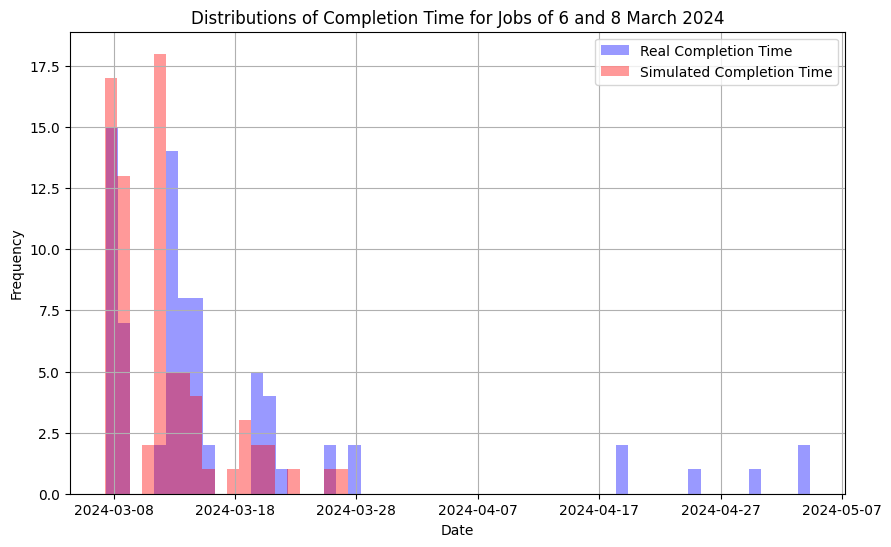

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Assuming your pandas dataframe is named 'df'

plt.figure(figsize=(10, 6))

# Convert datetime columns to matplotlib dates
completed_dates = mdates.date2num(final['Completed Date'].dt.to_pydatetime())
end_times = mdates.date2num(final['End_time'].dt.to_pydatetime())

# Create histograms with one bin per 3 days
bin_width = 1
bins_completed = np.arange(min(completed_dates), max(completed_dates) + bin_width, bin_width)
bins_end_time = np.arange(min(end_times), max(end_times) + bin_width, bin_width)

plt.hist(completed_dates, bins=bins_completed, alpha=0.4, color='blue', label='Real Completion Time')
plt.hist(end_times, bins=bins_end_time, alpha=0.4, color='red', label='Simulated Completion Time')

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distributions of Completion Time for Jobs of 6 and 8 March 2024')
plt.legend()
plt.show()

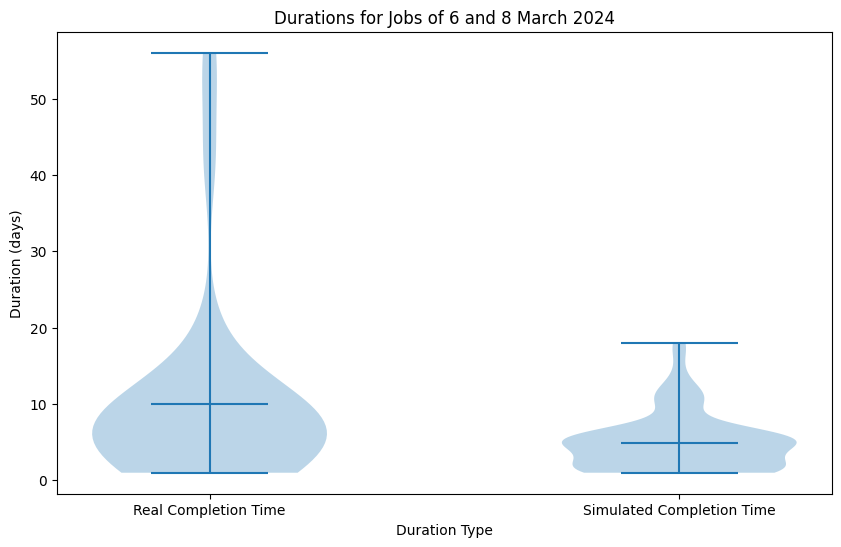

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the duration between 'Job Date' and 'Completed Date'
completed_duration = (final['Completed Date'] - final['Job Date']).dt.days

# Calculate the duration between 'Job Date' and 'End_time'
end_duration = (final['End_time'] - final['Job Date']).dt.days

# Create a violin plot of the duration distribution
plt.figure(figsize=(10, 6))

plt.violinplot([completed_duration, end_duration], showmeans=True)

plt.xlabel('Duration Type')
plt.ylabel('Duration (days)')
plt.title('Durations for Jobs of 6 and 8 March 2024')

plt.xticks([1, 2], ['Real Completion Time', 'Simulated Completion Time'])
plt.show()

In [14]:
completed_duration


76     7
91     8
104    2
105    7
115    1
      ..
647    7
651    7
655    7
659    8
664    8
Length: 76, dtype: int64

In [15]:
end_duration


76     1
91     1
104    1
105    1
115    1
      ..
647    5
651    6
655    5
659    5
664    6
Length: 76, dtype: int64

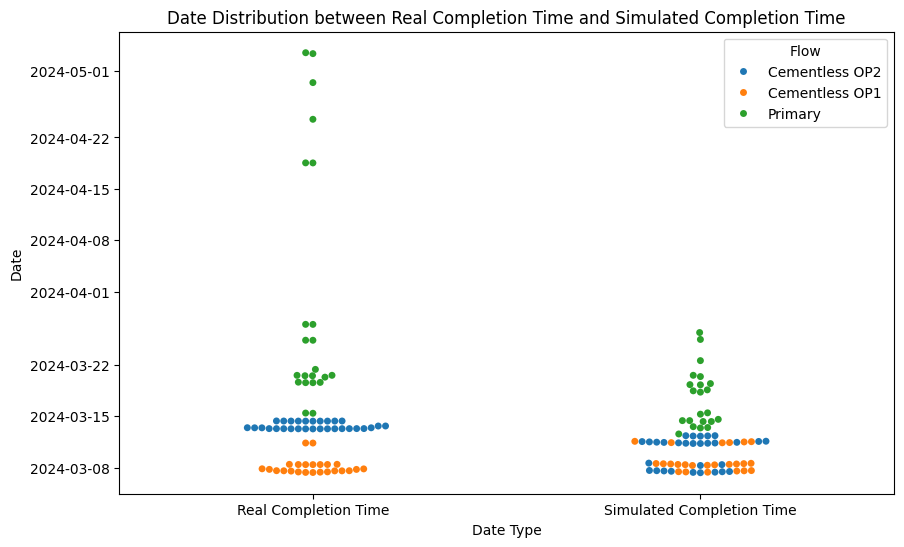

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a new variable with the specified conditions
final['Flow'] = np.where(final['Cementless'] == 'CTD', 'Primary',
                            np.where((final['Cementless'] == 'CLS') & (final['operation'] == 'OP1'), 'Cementless OP1', 'Cementless OP2'))

# Create a new dataframe for the swarmplot
end_time_df = pd.DataFrame({
    'Date Type': ['Real Completion Time'] * len(final) + ['Simulated Completion Time'] * len(final),
    'Date': list(final['Completed Date']) + list(final['End_time']),
    'Flow': list(final['Flow']) + list(final['Flow'])
})

# Create a side-by-side swarmplot
plt.figure(figsize=(10, 6))

sns.swarmplot(x='Date Type', y='Date', hue='Flow', data=end_time_df)

plt.title('Date Distribution between Real Completion Time and Simulated Completion Time')
plt.ylabel('Date')
plt.xlabel('Date Type')

plt.show()

In [16]:
final['completed_duration'] = (final['Completed Date'] - final['Job Date']).dt.days

In [17]:
final['end_duration'] = (final['End_time'] - final['Job Date']).dt.days

In [19]:
final.groupby('Flow')['completed_duration'].mean()


Flow
Cementless OP1     1.625000
Cementless OP2     7.333333
Primary           22.545455
Name: completed_duration, dtype: float64

In [20]:
final.groupby('Flow')['end_duration'].mean()


Flow
Cementless OP1    2.500000
Cementless OP2    3.666667
Primary           9.045455
Name: end_duration, dtype: float64

## Check partial tasks

In [24]:
final_schedule = catalog.load('final_schedule')

[09/25/24 11:20:40] INFO     Loading data from final_schedule (ExcelDataset)...                 ]8;id=995846;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=935917;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [30]:
import pandas as pd

# Define task sequences for each type of product
cementless_op1_tasks = [1, 2, 3, 4, 5, 6, 7]
cementless_op2_tasks = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cemented_tasks = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

def find_partial_tasks(df: pd.DataFrame, user_date: str = '2024-03-08') -> dict:
    """
    Find the remaining tasks for each order based on the first occurrence of each order.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the orders and tasks.

    Returns:
    dict: A dictionary where the keys are the orders and the values are the remaining tasks.

    Notes:
    This function assumes that the input dataframe has columns 'End_time', 'Order', and 'task'.
    The function filters the dataframe for a specific date (hardcoded as '2024-03-08' for now) and then finds the first occurrence of each order.
    The remaining tasks are determined based on the task sequence of each product type (cementless_op1, cementless_op2, and cemented).
    """
    # Step 1: Sort the dataframe by 'End_time' ascending
    df = df.sort_values(by='End_time')

    # Step 2: Filter the dataframe for a user-specified date
    df_filtered = df[df['End_time'] >= user_date]

    # Step 3: Find the first occurrence of every unique 'Order' and log the 'task'
    first_occurrences = df_filtered.groupby('Order').head(1)[['Order', 'task']]

    # Step 4: Create a dictionary of 'Order' as keys and the remaining task sequence as values
    task_sequences = {}
    for index, row in first_occurrences.iterrows():
        order = row['Order']
        task = row['task']
        if task in cementless_op1_tasks:
            task_sequence = cementless_op1_tasks
        elif task in cementless_op2_tasks:
            task_sequence = cementless_op2_tasks
        elif task in cemented_tasks:
            task_sequence = cemented_tasks
        else:
            continue
        remaining_tasks = task_sequence[task_sequence.index(task):]
        task_sequences[order] = remaining_tasks

    return task_sequences

task_sequences = find_partial_tasks(final_schedule)

In [31]:
task_sequences


{
    4421902: [13, 14, 15, 16, 17, 18, 19, 20],
    4421923: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4421919: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4421815: [2, 3, 4, 5, 6, 7],
    4421803: [2, 3, 4, 5, 6, 7],
    4421904: [20],
    4421802: [7],
    4421804: [3, 4, 5, 6, 7],
    4421929: [18, 19, 20],
    4421817: [3, 4, 5, 6, 7],
    4421824: [2, 3, 4, 5, 6, 7],
    4421813: [7],
    4421925: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4421806: [3, 4, 5, 6, 7],
    4421912: [18, 19, 20],
    4421823: [2, 3, 4, 5, 6, 7],
    4421801: [1, 2, 3, 4, 5, 6, 7],
    4421812: [1, 2, 3, 4, 5, 6, 7],
    4421913: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4421811: [2, 3, 4, 5, 6, 7],
    4421905: [15, 16, 17, 18, 19, 20],
    4421814: [2, 3, 4, 5, 6, 7],
    4421924: [13, 14, 15, 16, 17, 18, 19, 20],
    4421816: [2, 3, 4, 5, 6, 7],
    4421822: [2, 3, 4, 5, 6, 7],
    4421930: [16, 17, 18, 19, 20],
    4422219: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],

In [1]:
partial_task_dict = catalog.load('custom_tasks_dict')

[09/25/24 14:17:26] INFO     Loading data from custom_tasks_dict (PickleDataset)...             ]8;id=225300;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=68971;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [2]:
partial_task_dict


{
    4420515: [19, 20],
    4420519: [19, 20],
    4420710: [14, 15, 16, 17, 18, 19, 20],
    4420403: [2, 3, 4, 5, 6, 7],
    4420713: [12, 13, 14, 15, 16, 17, 18, 19, 20],
    4420407: [6, 7],
    4420514: [18, 19, 20],
    4420703: [18, 19, 20],
    4420715: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4420517: [17, 18, 19, 20],
    4420714: [17, 18, 19, 20],
    4420520: [18, 19, 20],
    4420506: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4420718: [16, 17, 18, 19, 20],
    4420411: [7],
    4420507: [17, 18, 19, 20],
    4420709: [17, 18, 19, 20],
    4420716: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4420510: [17, 18, 19, 20],
    4420516: [16, 17, 18, 19, 20],
    4420508: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    4420504: [16, 17, 18, 19, 20],
    4420701: [16, 17, 18, 19, 20],
    4420509: [16, 17, 18, 19, 20],
    4420717: [16, 17, 18, 19, 20],
    4420401: [7],
    4420503: [13, 14, 15, 16, 17, 18, 19, 20],
    4420424: [7]
}

In [3]:
mapping_dict = catalog.load('mapping_dict_read')

[09/25/24 16:07:25] INFO     Loading data from mapping_dict_read (PickleDataset)...             ]8;id=329964;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=950527;file://C:\Users\JeanLucOudshoorn\miniconda3\envs\EIT-Epsilon\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [4]:
mapping_dict


{
    4420401: 4,
    4420407: 8,
    4420403: 9,
    4420411: 11,
    4420424: 12,
    4420520: 17,
    4420509: 19,
    4420516: 21,
    4420517: 23,
    4420519: 24,
    4420506: 26,
    4420507: 27,
    4420503: 30,
    4420504: 32,
    4420515: 34,
    4420514: 35,
    4420508: 36,
    4420510: 37,
    4420710: 40,
    4420703: 42,
    4420709: 45,
    4420713: 47,
    4420716: 48,
    4420717: 50,
    4420718: 51,
    4420714: 52,
    4420701: 53,
    4420715: 54,
    4421314: 56,
    4421319: 57,
    4421316: 58,
    4421312: 59,
    4421313: 60,
    4421320: 61,
    4421321: 62,
    4421322: 63,
    4421318: 64,
    4421302: 65,
    4421311: 66,
    4421317: 67,
    4421301: 68,
    4421315: 69,
    4421303: 70,
    4421307: 71,
    4421305: 72,
    4421310: 73,
    4421304: 74,
    4421309: 75,
    4421306: 76,
    4421308: 77
}